In [33]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [36]:
PATH = "./Second pass model outputs\\t5_with_new_embedding_2023_test_set.csv"

test_data_df = pd.read_csv(PATH)
test_data_df.head()

,S.N.,Date,Letter Accuracy,Word Accuracy,Letter Accuracy.1,Word Accuracy.1
0,26,8/1/2023,100.0,100.0,100.0,100.0
1,27,8/2/2023,100.0,100.0,100.0,100.0
2,28,8/3/2023,100.0,100.0,100.0,100.0
3,29,8/4/2023,100.0,100.0,100.0,100.0
4,30,8/5/2023,100.0,100.0,100.0,100.0


In [37]:
test_data_df.columns

Index(['S.N.', 'Date', 'Letter Accuracy', 'Word Accuracy', 'Letter Accuracy.1',
       'Word Accuracy.1'],
      dtype='object')

In [48]:
avg_fpass_lett_accu = test_data_df['Letter Accuracy'].mean()
avg_spass_lett_accu = test_data_df['Letter Accuracy.1'].mean()
avg_fpass_word_accu = test_data_df['Word Accuracy'].mean()
avg_spass_word_accu = test_data_df['Word Accuracy.1'].mean()

total_size = len(test_data_df)

avg_perfect_puzzle_accuracy_fpass = len(test_data_df[test_data_df['Letter Accuracy'] == 100.0]) / total_size * 100.0
avg_perfect_puzzle_accuracy_spass = len(test_data_df[test_data_df['Letter Accuracy.1'] == 100.0]) / total_size * 100.0

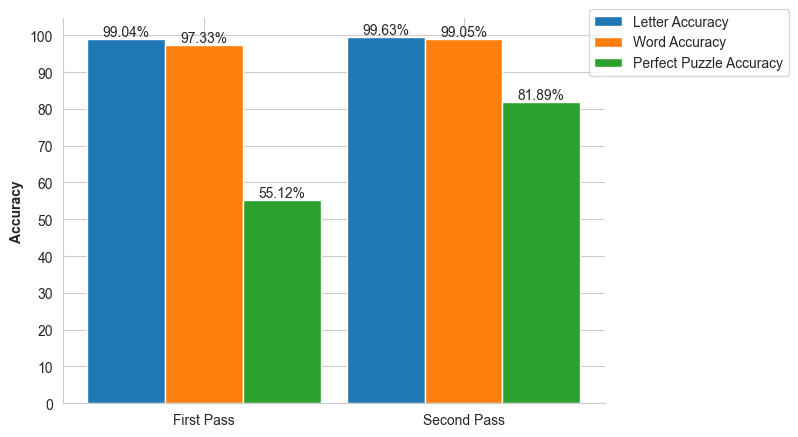

In [126]:
# Set up positions for each group
ind = np.arange(2)  # Assuming you have 3 groups

# Set the width of the bars
width = 0.30  # Adjust this based on your preference
sns.set_style('whitegrid')
# Create grouped bar plots
plt.figure(figsize=(7, 5))
bars1 = plt.bar(ind, [avg_fpass_lett_accu, avg_spass_lett_accu], width, label='Letter Accuracy')
bars2 = plt.bar(ind + width, [avg_fpass_word_accu, avg_spass_word_accu], width, label='Word Accuracy')
bars3 = plt.bar(ind + 2 * width, [avg_perfect_puzzle_accuracy_fpass, avg_perfect_puzzle_accuracy_spass], width, label='Perfect Puzzle Accuracy')

# Labeling and customization
# plt.xlabel('Metrics')
plt.ylabel('Accuracy', font = {'weight': 'bold', 'size': 10})
plt.yticks(np.arange(0, 110, 10))
plt.xticks(ind + width, ['First Pass', 'Second Pass'])
# plt.legend(loc = (0.5545, 0.039))
plt.legend(loc = (0.97, 0.85))

# Add percentage labels on top of each bar
def add_percentage_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height:.2f}%', ha='center', va='bottom')

add_percentage_labels(bars1)
add_percentage_labels(bars2)
add_percentage_labels(bars3)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.savefig("./Figures/first pass vs second pass.png", dpi = 240, bbox_inches = 'tight')
plt.show()